# Анализ гипотез интернет-магазина

Проект посвящен анализу способов увеличения выручки интернет-магазина с помощью анализа гипотез и A/В тестирования.

Цель проекта - помочь интернет-магазину принять правильное решение по применению нужного метода для увелечения выручки магазина. 

Для достижения цели имеются 3 датафрейма: один со списком гипотез, один с информацией о заказах по группам А/В теста, и третий датафрейм о количестве пользователей в группе. 

Проект состоит из двух частей. В первой части была проанализирована приоритизация гипотез двумя фреймворками - ICE, RICE, рассмотрена разница результатов и сделаны выводы. Во второй части проекта был проведен А/В анализ: были построены необходимые графики, найдены перцентили, построены гипотезы о различии рузультатов двух групп. На основании теста был сделан вывод. 

***Часть 1***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
import scipy.stats as stats

In [3]:
hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
pd.options.display.max_colwidth = 130
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
#Применим ICE для приоритизации гипотез
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'] 

display((hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


По фреймворку IСE наиболее приоритетной гипотезой является гипотеза №8 - Запустить акцию, дающую скидку на товар в день рождения. Также приоритетными являются:

0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

In [5]:
#Применим RICE для приоритизации гипотез
hypothesis['RICE'] = hypothesis['Impact'] * hypothesis['Confidence'] * hypothesis['Reach']/ hypothesis['Efforts']

display(hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По фреймворку RICE наиболее приоритными гипотезами 7, 2, 0 и 6

Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	

Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

Приоритетность гипотез в зависимости от разных подходов сильно изменилась. Однако гипотеза №7 и №0 вошли в топ-3 в обоих случаях. А гипотеза №8, которая возглавляла список в ICE, опустилась на пятое место в RICE, поменявшись местами с гипотезой №2. Очевидно это связано с показателем Reach, который показывает скольких пользователей затронет изменение, которое мы хотим внести. Переменность гипотез означает, что гипотезы 7, 2 и 0 затронут наибольшее количество пользователей. Значит, можно сделать вывод, что нужно точно протестировать гипотезу №7:

Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

Возможно также стоит рассмаотреть гипотезу №2 и №0:

Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

***Часть 2***

In [6]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [7]:
print(orders.info())
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [8]:
#Изменим тип данных в столбцах с датой
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [9]:
#проверим данные на пропуски
print(orders.isna().sum())
visitors.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


date        0
group       0
visitors    0
dtype: int64

In [10]:
#Проверим данные на дубликаты
print(orders.duplicated().sum())
visitors.duplicated().sum()

0


0

In [11]:
#Проверим данные на неявные дубликаты
print(orders['group'].unique())
visitors['group'].unique()

['B' 'A']


array(['A', 'B'], dtype=object)

Данные готовы к анализу

***Задача 1 - график кумулятивной выручки по группам***

Text(0.5, 1.0, 'Куммулятивная выручка по группам')

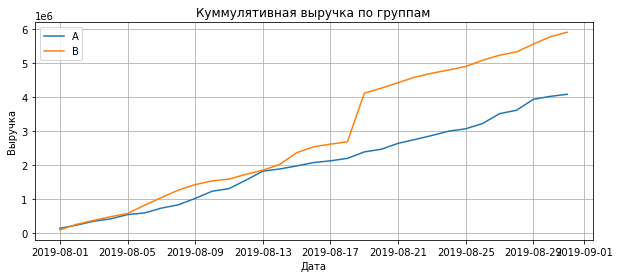

In [12]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitorId' : 'nunique', 'transactionId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'buyers', 'orders', 'revenue', 'visitors']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10,4))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.grid()
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Куммулятивная выручка по группам')

Вывод: Куммулятивная выручка группы В явно повышается стабильнее и выше, чем группа А. Резкий скачок выручки у группы В произошел после 17 августа 2019, возможно это связано с увеличением заказов в эти даты. Однако стоит проверить на случай выбросов. 

In [13]:
#Посмотрим суммы заказов в период скачка выручки
orders.query('date < "2019-08-21"  and date > "2019-08-17"').sort_values(by='revenue', ascending=False).head(10)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
530,3970235543,2912540959,2019-08-19,43990,A
751,348143148,689129267,2019-08-20,37150,B
527,1570513684,2837914161,2019-08-19,33405,B
421,3765974140,1357170471,2019-08-19,31680,A
461,2683113224,154576532,2019-08-19,26550,B
630,1329556473,2626290177,2019-08-20,25890,B
294,3709669952,3295038680,2019-08-18,23750,A
525,3031564664,393266494,2019-08-19,21550,A
368,3268879337,2536252163,2019-08-19,20026,B


Действительно, в группе В выбивается один заказ, выручка с которого составила - 1294500. Данный заказ явно не является средним или типичным.

***Задача 2 - график кумулятивного среднего чека по группам***

Text(0.5, 1.0, 'Куммулятивный средний чек по группам')

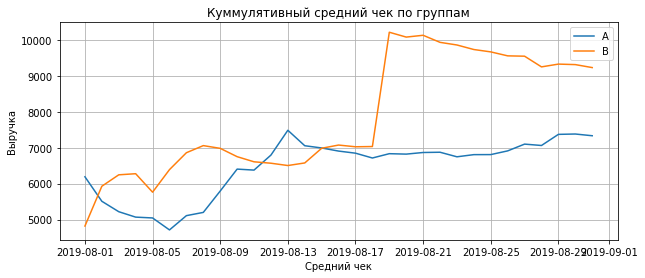

In [14]:
#Построим графики среднего чека по группам
plt.figure(figsize=(10,4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.grid()
plt.xlabel('Средний чек')
plt.ylabel('Выручка')
plt.title('Куммулятивный средний чек по группам')

Вывод: Снова сильно виден рост группы В из-за заказа, указанного выше. В целом график напоминает предыдущий, однако наблюдается период в районе 13 августа, когда средний чек группы А был выше. Так же можно обратить внимание, что к концу периода средний чек группы А стабильно растет, а вот в группе В наоборот падает после большого заказа. 

***Задача 3 - график относительного изменения кумулятивного среднего чека группы B к группе A***

Text(0.5, 1.0, 'Изменение кумулятивного среднего чека группы В к группе А')

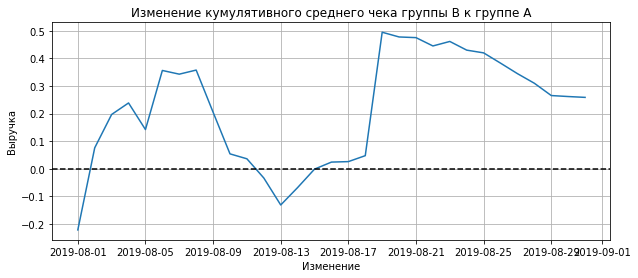

In [15]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,4))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.grid()
plt.xlabel('Изменение')
plt.ylabel('Выручка')
plt.title('Изменение кумулятивного среднего чека группы В к группе А')

Вывод: В целом график показывает относительно схожие выводы, как и в предвдущем. Куммулятивный средний чек группы В чаще был больше, спад наблюдается в районе 9 августа и продолжается до 13 августа, в эти даты средний чек группы А был больше. Однако в дальнейшем видно преимущество чека группы В, хотя после 19 августа(крупного заказа) наблюдается постепенный спад.

***Задача 4 - график кумулятивного среднего количества заказов на посетителя по группам.***

Text(0.5, 1.0, 'Куммулятивное среднее количество заказов на посетителя')

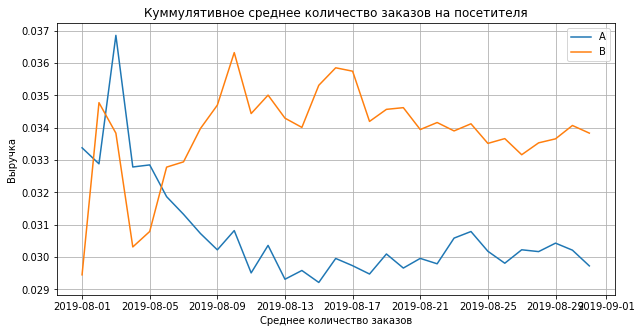

In [16]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(10,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.grid()
plt.xlabel('Среднее количество заказов')
plt.ylabel('Выручка')
plt.title('Куммулятивное среднее количество заказов на посетителя')

Вывод: Общая картина явно показывает преимущество коммулятивной конверсии группы В над А. Хотя в начале промежутка конверсии можно назвать схожими. Конверсия группы А достигла своего пика в промежутке между 1 и 6 августа и потом начала постепенно снижаться и снижалась до конца рассматриваемого периода. А конверсия группы В примерно с 4 августа начала рости.

***Задача 5 -  график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A***

Text(0.5, 1.0, 'Изменение кумулятивного среднего количества заказов на посетителя')

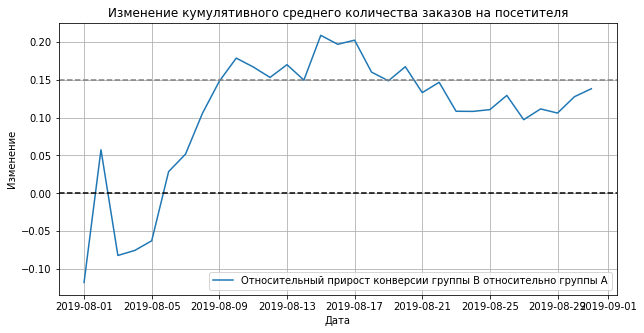

In [17]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.grid()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Изменение')
plt.title('Изменение кумулятивного среднего количества заказов на посетителя')

Вывод: В начале периода у обеих групп наблюдался сильный рост конверсии, что иллюстрирует пик на диаграмме после 1 августа. Однако после пика наблюдается сильный спад, который начинает снова расти примерно 3 августа и дальше постоянно растет. Наибольший прирост наблюдается после 13 августа и 17 августа. Далее прирост конверсии группы В относительно группы А постепенно снижается, но в последние дни снова берет курс на рост. 

***Задача 6 - точечный график количества заказов по пользователям*** 

Text(0.5, 1.0, 'Количество заказов по пользователям')

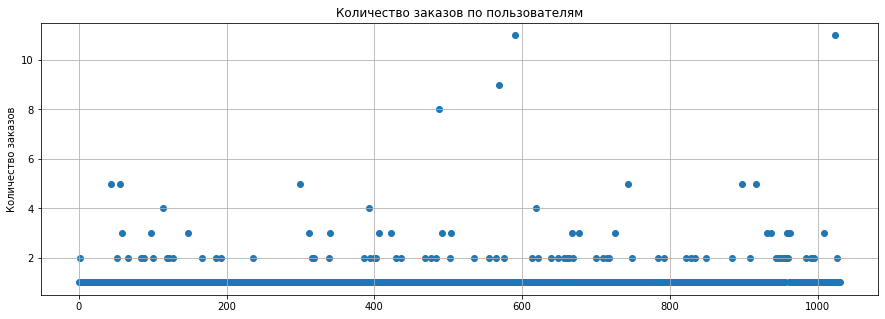

In [18]:
ordersByUsers = (orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'}))

ordersByUsers.columns = ['visitorId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(15,5))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.grid()
plt.ylabel('Количество заказов')
plt.title('Количество заказов по пользователям')

Вывод: Большинство пользователей сделали 1 заказ, реже 2, езе реже 3 заказа. Количество заказов привышающих 3 лостаточно редко, однако встречаются и единичные пользователи, совершившие 8, 9 и даже больше 10 заказов. Но таких пользователей суммарно 4 человека. Очевидно, что пользователи с заказами больше 3 - аномальные значения.

***Задача 7 - 95-й и 99-й перцентили количества заказов на пользователя***

In [19]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Вывод: 95% пользователей совершили заказы не более 2 раз. Не более 5% пользователей оформили больше 2 заказов, и только 1% оформил больше 4 заказов. Значит, все пользователи, совершившие 3 и более заказов - выбросы.

***Задача 8 - точечный график стоимостей заказов***

Text(0.5, 1.0, 'Стоимости заказов')

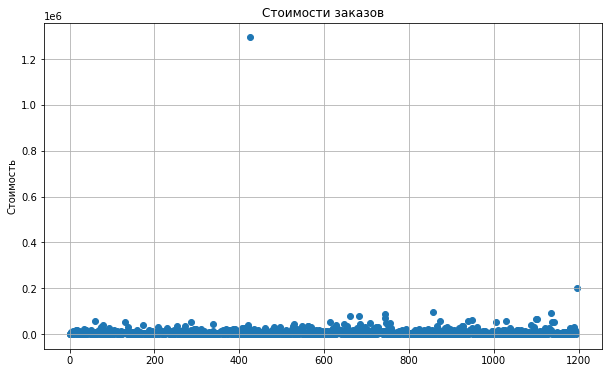

In [20]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(10,6))
plt.scatter(x_values, orders['revenue'])
plt.grid()
plt.ylabel('Стоимость')
plt.title('Стоимости заказов')

In [21]:
#Удалим редкие значения для более эффективного изучения графика
orders_1 = orders[orders['revenue'] < 900000]

Text(0.5, 1.0, 'Стоимости заказов')

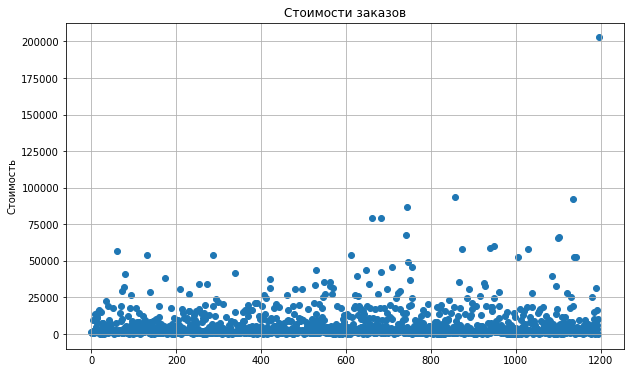

In [22]:
x_values = pd.Series(range(0, len(orders_1['revenue'])))
plt.figure(figsize=(10,6))
plt.scatter(x_values, orders_1['revenue'])
plt.grid()
plt.ylabel('Стоимость')
plt.title('Стоимости заказов')

Вывод: Большиснтво заказов обладают стоимостью, не превышающей 100000. Есть один заказ, о котором писалось выше, который явно выбивается и его стоимость больше 1.2., он был удален, как аномальный во втором графике. Также можно заметить еще один выброс, где стоимость заказа больше 200000.

***Задача 9 - 95-й и 99-й перцентили стоимости заказов***

In [23]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Вывод: Только 5% от всех заказов превышают стоимость в 28000 и только 1% превышает 58233.2. Это явные выбросы

***Задача 10 - статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным***

Гипотезы:

H0: различий в среднем количестве заказов между группами нет.

H1: различия в среднем между группами есть.

In [24]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

0.01679
0.138


Вывод: значение p-value сильно меньше 0.05, значит нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. По анализу сырых данных можно сделать вывод, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы В к конверсии группы А равен 13,8%.

***Задача 11 - статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным***

Гипотезы:

H0: различий в среднем чеке заказа между группами нет.

H1: различия в среднем между группами есть.

In [25]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


Вывод: p-value значительно больше 0.05, значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Однако, средний чек группы B выше среднего чека группы A на 25,9%.

***Задача 12 - статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным***

В предыдущих задачах были найдены 95-й и 99-й перцентили количества заказов:
95 - 2
99 - 4

А перцентили стоимости заказа были следующими:
95 - 28000
99 - 58233.2

Для анализа по "очищенным" данным необходимо убрать аномальные значения. Пусть анамольными пользоватлеями считаются те, кто совершил больше 2х заказов, где стоимость заказа не превышает 58233.2. 

Посчитаем количество аномальных пользователей.


In [26]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233.2]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
Name: visitorId, dtype: int64
31


Количество аномальных пользователей - 31 человек. Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. 

In [27]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.010
0.174


Вывод: p-value меньше 0.05, значит нулевую гипотезу отвергаем. То есть между группами А и В есть статистические различия по среднему количеству заказов на посетителя. При этом относительный прирост В к А увеличился по сравнению с необработанными данными на 3.6% (17.4% - 13.8%). 

***Задача 13 - статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным***

In [28]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 


0.798
-0.020


Вывод: p-value значительно больше 0.5, значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Однако средний чек заказа группы В уступает среднему чеку группы А на 2%. Что сильно отличается от анализа данных с аномальными значениями, т.к. в том случае прирост В был больше А на 25,9%. Очевидно, такая перемена объясняется исключением аномальных значений, в частности пользователя с заказом, превышающим 1 млн, о котором говорилось выше, он сильно влиял на общий массив данных.

***Задача 14 -  решение по результатам теста***

По результатам теста можно прийти к выводу, что пора остановливать тестирование и признать победу группы В, т.к. конверсия группы В выше, чем у группы А, при чем как в сырых, так и очищенных от аномалий данных. В первом случае прирост конверсии составляет 13,8%, а во втором 17,4%. Хотя различий в среднем чеке заказа в двух группах практически нет. Средний чек заказа группы В уступает среднему чеку группы А всего на 2%

***Общий вывод***

Были рассмотрены данные интернет-магазина с информацией о заказах и пользователях, их совершивших. Также были изучены гипотезы по увеличению выручки магазина. Данные были обработаны, приведены к нужному типу, проверены на пропуски и дубликаты. 

Далее была проанализирована приоритизация гипотез, был проведен А/В анализ, в результате которого был принят вариант горуппы B, т.к. конверсия этой группы явно превышает конверсию группы А.

Цель проекта была достигнута, решение принято на основе проведенного A/В теста.